# Image Reconstruction.

In [1]:
%matplotlib inline
import pickle
import dicto as do
import numpy as np
import tensorflow as tf
import os

import matplotlib.pyplot as plt

from python_path import PythonPath
with PythonPath("/code/traffic_sign_classifier/"):
    from german_traffic_densenet import model_fn
    from german_traffic_dataset import input_fn

In [3]:
with open("/data/valid.p", "rb") as fd:
    validation = pickle.load(fd)

In [8]:
params = do.load("/code/traffic_sign_classifier/configs.yml")

In [26]:
validate_input_fn = lambda : input_fn(valid['features'], valid['labels'].astype(np.int32), params.train_params, training=False)

In [27]:
validation_images = validate_input_fn()

In [28]:
validation_images

<PrefetchDataset shapes: ((16, 32, 32, 3), (16,)), types: (tf.float32, tf.int32)>

In [29]:
tf_iterator = validation_images.make_one_shot_iterator()

In [30]:
iter_op = tf_iterator.get_next()

In [31]:
with tf.Session() as sess:
    first_batch = sess.run(iter_op)

In [32]:
first_element = (first_batch[0][0], first_batch[1][0])

In [33]:
first_element

(array([[[ 0.0509804 ,  0.04705883,  0.04705883],
         [ 0.04705883,  0.04313726,  0.04705883],
         [ 0.0509804 ,  0.04313726,  0.04313726],
         ..., 
         [ 0.05490196,  0.04705883,  0.04313726],
         [ 0.0509804 ,  0.04705883,  0.04313726],
         [ 0.04705883,  0.04705883,  0.04313726]],
 
        [[ 0.0509804 ,  0.04705883,  0.0509804 ],
         [ 0.04705883,  0.04313726,  0.04705883],
         [ 0.0509804 ,  0.04705883,  0.04705883],
         ..., 
         [ 0.0509804 ,  0.04705883,  0.04313726],
         [ 0.0509804 ,  0.04705883,  0.04313726],
         [ 0.04705883,  0.04705883,  0.04313726]],
 
        [[ 0.0509804 ,  0.04705883,  0.0509804 ],
         [ 0.04705883,  0.04313726,  0.04705883],
         [ 0.04705883,  0.04705883,  0.04705883],
         ..., 
         [ 0.0509804 ,  0.04705883,  0.04313726],
         [ 0.0509804 ,  0.04705883,  0.04313726],
         [ 0.04705883,  0.04705883,  0.04313726]],
 
        ..., 
        [[ 0.0627451 ,  0.058823

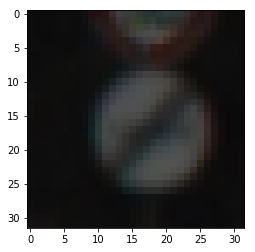

In [34]:
plt.imshow(first_element[0])

In [22]:
first_element[0].shape

(32, 32, 3)

In [23]:
image_tf = tf.image.convert_image_dtype(first_element[0], tf.float32)

In [24]:
with tf.Session() as sess:
    sess_image_tf = sess.run(image_tf)

In [25]:
sess_image_tf

array([[[ 13.,  12.,  12.],
        [ 12.,  11.,  12.],
        [ 13.,  11.,  11.],
        ..., 
        [ 14.,  12.,  11.],
        [ 13.,  12.,  11.],
        [ 12.,  12.,  11.]],

       [[ 13.,  12.,  13.],
        [ 12.,  11.,  12.],
        [ 13.,  12.,  12.],
        ..., 
        [ 13.,  12.,  11.],
        [ 13.,  12.,  11.],
        [ 12.,  12.,  11.]],

       [[ 13.,  12.,  13.],
        [ 12.,  11.,  12.],
        [ 12.,  12.,  12.],
        ..., 
        [ 13.,  12.,  11.],
        [ 13.,  12.,  11.],
        [ 12.,  12.,  11.]],

       ..., 
       [[ 16.,  15.,  15.],
        [ 15.,  14.,  14.],
        [ 15.,  15.,  15.],
        ..., 
        [ 13.,  12.,  12.],
        [ 14.,  13.,  13.],
        [ 14.,  13.,  13.]],

       [[ 18.,  16.,  16.],
        [ 17.,  15.,  15.],
        [ 18.,  16.,  16.],
        ..., 
        [ 12.,  11.,  11.],
        [ 13.,  12.,  12.],
        [ 14.,  13.,  13.]],

       [[ 19.,  17.,  17.],
        [ 18.,  16.,  16.],
        [ 1

In [ ]:
first_element